In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

In [39]:
loan = pd.read_csv("loan.csv")
#importing the train and test file

# Exploratory Data Analysis

In [40]:
loan.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [41]:
loan.isnull().sum() # checking for null values in the data set

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

we can see that null values are present in various features or columns.

we can drop 'Loan_ID' as it is unique for each customer

In [42]:
loan.drop('Loan_ID',axis=1,inplace=True)

In [43]:
loan.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can see that there are 7 categorical and 5 numerical features

Analyzing the columns with null values

Male      489
Female    112
Name: Gender, dtype: int64


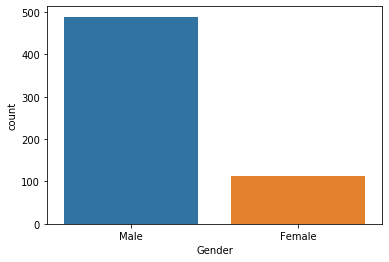

In [44]:
print(loan['Gender'].value_counts())
sns.countplot('Gender', data=loan)
plt.show()


We can see that the amoung both the genders, Loan taken by male is more than female

In [45]:
loan['Gender'].unique(), loan['Gender'].mode() # we can fill the null values with the mode of the column

(array(['Male', 'Female', nan], dtype=object),
 0    Male
 dtype: object)

Yes    398
No     213
Name: Married, dtype: int64


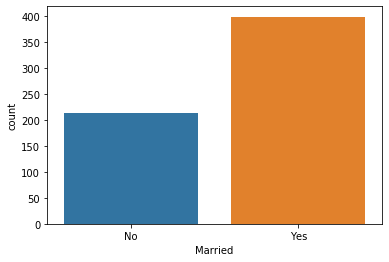

In [46]:
print(loan['Married'].value_counts())
sns.countplot('Married', data=loan)
plt.show()


we can see that the loan taken people who have married are more than the people who are unmarried

In [47]:
loan['Married'].unique(), loan['Married'].mode() # we can fill the null values with the mode of the column

(array(['No', 'Yes', nan], dtype=object),
 0    Yes
 dtype: object)

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


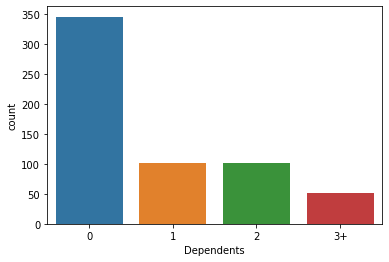

In [48]:
print(loan['Dependents'].value_counts())
sns.countplot(x='Dependents', data=loan)
plt.show()


A dependent is a person whom the borrower supports financially. We can see that people with no dependents take more loan when compared to people with dependents

In [49]:
loan['Dependents'].unique(), loan['Dependents'].mode() # we can fill the null values with the mode of the column

(array(['0', '1', '2', '3+', nan], dtype=object),
 0    0
 dtype: object)

No     500
Yes     82
Name: Self_Employed, dtype: int64


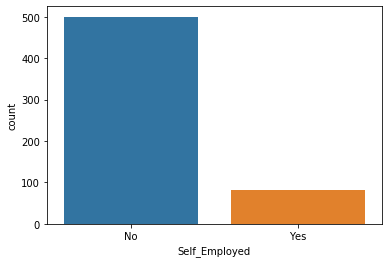

In [50]:
print(loan['Self_Employed'].value_counts())
sns.countplot('Self_Employed', data=loan)
plt.show()


We can see that the loan taken by self employed people is much less that the people who are not self employed

In [51]:
loan['Self_Employed'].unique(), loan['Self_Employed'].mode() # we can fill the null values with the mode of the column

(array(['No', 'Yes', nan], dtype=object),
 0    No
 dtype: object)

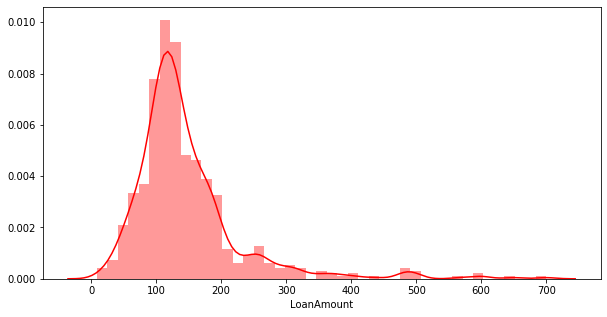

In [52]:
import matplotlib.pyplot as mat_plt
mat_plt.figure(figsize= (10,5))
import seaborn as sns
pl = sns.distplot(loan['LoanAmount'],color = 'r')


We can see that 'LoanAmount' is following normal distribution

In [53]:
loan['LoanAmount'].unique(), loan['LoanAmount'].mean() # we can fill the null values with the mean of the column

(array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
        109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
        116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
        144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
        135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
        113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
         25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
         85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
        129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
        101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
         90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
         42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
        436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
        376., 117.,  71., 490., 173., 

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


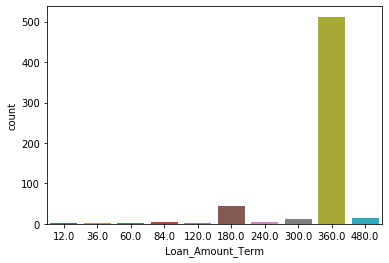

In [54]:
print(loan['Loan_Amount_Term'].value_counts())
sns.countplot('Loan_Amount_Term', data=loan)
plt.show()


We can see that maximum Loan_Amount_Term is 360.0

In [55]:
loan['Loan_Amount_Term'].unique(), loan['Loan_Amount_Term'].mode() # we can fill the null values with the mode of the Loan_Amount_Term

(array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.]),
 0    360.0
 dtype: float64)

1.0    475
0.0     89
Name: Credit_History, dtype: int64


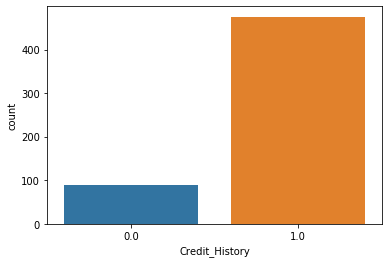

In [56]:
print(loan['Credit_History'].value_counts())
sns.countplot('Credit_History', data=loan)
plt.show()


We can see that people with credit history '1.0' are more when compared to people with '0.0' credit history

In [57]:
loan['Credit_History'].unique(), loan['Credit_History'].mode() # we can fill the null values with the mode of the column

(array([ 1.,  0., nan]),
 0    1.0
 dtype: float64)

In [58]:
loan['Gender'].fillna(loan['Gender'].value_counts().idxmax(), inplace=True)
loan['Married'].fillna(loan['Married'].value_counts().idxmax(), inplace=True)
loan['Dependents'].fillna(loan['Dependents'].value_counts().idxmax(), inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].value_counts().idxmax(), inplace=True)
loan["LoanAmount"].fillna(loan["LoanAmount"].mean(skipna=True), inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].value_counts().idxmax(), inplace=True)



In [59]:
loan.isnull().sum() # Cross-checking for null values in the data set

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Standardizing all numerical features

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

loan[['ApplicantIncome','CoapplicantIncome','LoanAmount']]=scaler.fit_transform(loan[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

In [61]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.070489,0.000000,0.198860,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,0.030093,0.056592,0.160637,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,0.072356,0.000000,0.191027,360.0,1.0,Urban,Y


# label Encoding

In [62]:
#converting categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
loan['Gender']=label.fit_transform(loan['Gender'])
loan['Married']=label.fit_transform(loan['Married'])
loan['Dependents']=label.fit_transform(loan['Dependents'])
loan['Education']=label.fit_transform(loan['Education'])
loan['Self_Employed']=label.fit_transform(loan['Self_Employed'])
loan['Loan_Amount_Term']=label.fit_transform(loan['Loan_Amount_Term'])
loan['Credit_History']=label.fit_transform(loan['Credit_History'])
loan['Property_Area']=label.fit_transform(loan['Property_Area'])
loan['Loan_Status']=label.fit_transform(loan['Loan_Status'])

In [63]:
loan.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.070489,0.000000,0.198860,8,1,2,1
1,1,1,1,0,0,0.054830,0.036192,0.172214,8,1,0,0
2,1,1,0,0,1,0.035250,0.000000,0.082489,8,1,2,1
3,1,1,0,1,0,0.030093,0.056592,0.160637,8,1,2,1
4,1,0,0,0,0,0.072356,0.000000,0.191027,8,1,2,1
5,1,1,2,0,1,0.065145,0.100703,0.373372,8,1,2,1
6,1,1,0,1,0,0.027001,0.036384,0.124457,8,1,2,1
7,1,1,3,0,0,0.035696,0.060096,0.215630,8,0,1,0
8,1,1,2,0,0,0.047693,0.036624,0.230101,8,1,2,1
9,1,1,1,0,0,0.156970,0.263230,0.492041,8,1,1,0


# Splitting of train data into Independent and Target variables

In [64]:
ind=loan.drop("Loan_Status",axis=1)
tar=loan["Loan_Status"]
#splitting individual and target variable in ind and tar

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
#splitting into training and testing data set
ind_train,ind_test,tar_train,tar_test=train_test_split(ind,tar,test_size=22,random_state=43)
print(ind_train.shape)
print(ind_test.shape)
print(tar_train.shape)
print(tar_test.shape)

(592, 11)
(22, 11)
(592,)
(22,)


# Data Modeling and Prediction

In [67]:
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from  sklearn.naive_bayes import GaussianNB
from  sklearn.svm import SVC
from  sklearn.ensemble import RandomForestClassifier
from  sklearn.ensemble import AdaBoostClassifier
from  sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from  sklearn.preprocessing import MinMaxScaler
from  sklearn.model_selection import train_test_split
from  sklearn.preprocessing import PowerTransformer
from  sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import joblib
import warnings
warnings.filterwarnings('ignore')

In [68]:
# LogisticRegression, GaussianNB, Supportvectorclassifier, RandomForestClassifier, AdaBoostClassifier
lg=LogisticRegression()
gnb=GaussianNB()
sv=SVC()
rf=RandomForestClassifier(n_estimators=100)
ad=AdaBoostClassifier(n_estimators=100)
knn=KNeighborsClassifier() 
dtc=DecisionTreeClassifier()

In [69]:
model=[lg,gnb,sv,rf,ad,knn,dtc]

for m in model:
    m.fit(ind_train,tar_train)
    predict=m.predict(ind_test)
    print('accuracy score of:',m)
    print(accuracy_score(tar_test,predict))
    print(confusion_matrix(tar_test,predict))
    print(classification_report(tar_test,predict))
    score=cross_val_score(m,ind,tar,cv=5)
    print(score)
    print(score.mean())

accuracy score of: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.8636363636363636
[[ 6  3]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.81      1.00      0.90        13

    accuracy                           0.86        22
   macro avg       0.91      0.83      0.85        22
weighted avg       0.89      0.86      0.86        22

[0.81300813 0.7804878  0.7804878  0.85365854 0.81967213]
0.809462881514061
accuracy score of: GaussianNB(priors=None, var_smoothing=1e-09)
0.8636363636363636
[[ 6  3]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
    

In [70]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['lg','gnb','sv','rf','ad','knn','dtc']
models=[lg,gnb,sv,rf,ad,knn,dtc]
for i in models:
    model = i
    cv_result = cross_val_score(model,ind,tar, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
lg,0.809598,0.035573
gnb,0.793310,0.040415
sv,0.809598,0.035573
rf,0.785219,0.041225
ad,0.788445,0.040824
knn,0.757271,0.038617
dtc,0.728133,0.056986


According to Cross val score and accuracy we can see that the RandomForestClassifier has the least difference between Accuracy and Cross val score, therefore we select RandomForestClassifier model.

To get the best parameters and best results we use GridSearchCV 

In [71]:
from sklearn.model_selection import GridSearchCV
parameters = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],}

gs=GridSearchCV(rf,parameters)
gs.fit(ind_train,tar_train)

sorted(gs.cv_results_.keys())


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_bootstrap',
 'param_max_depth',
 'param_max_features',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

Best Parameters and best results

In [72]:
print(gs.best_params_)
best_result=gs.best_score_
print(best_result)

{'bootstrap': False, 'max_depth': 10, 'max_features': 'auto'}
0.804045007833642


In [73]:
import joblib
joblib.dump(rf,'Loan Application Status Prediction.obj') #save the model as object file


['Loan Application Status Prediction.obj']